<a href="https://colab.research.google.com/github/peterbabulik/QuantumWalker/blob/main/QCA_ML_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum-Driven Cellular Automata (QCA) and AI Analysis

This project explores the fascinating intersection of quantum mechanics, emergent complexity in cellular automata, and machine learning. The core idea is to develop Cellular Automata (CA) where the update rules for classical cell states are directly influenced by local quantum interactions. We then use machine learning techniques, particularly Transformers, to analyze, predict, and understand the dynamics of these Quantum-Driven Cellular Automata (QCA).

## Project Goals

1.  **Simulate QCAs:** Develop a simulation framework where classical CA cell states evolve based on the outcomes of quantum computations performed on associated quantum bits (qunodes).
2.  **Discover Complex QCA Rules:** Implement an automated search loop (the "Ouroboros Loop") using a simple Machine Learning model (LSTM) as a complexity probe to find QCA parameter sets that generate complex, non-trivial dynamics.
3.  **Train a "QCA AI":** Generate synthetic spatio-temporal data from these complex QCAs.
4.  **Predict QCA Evolution:** Train a more advanced AI model (e.g., a Transformer) on this synthetic data to predict the future evolution of the QCA.
5.  **Analyze "Quantum-Inspired" AI:** Investigate what the QCA AI learns about the emergent "physics" of the quantum-driven system and its ability to perform tasks like long-range prediction and pattern generation.

## Conceptual Framework: Quantum-Driven CA

The system consists of a 1D lattice of `N` sites (qunodes). Each qunode `i` possesses:
*   A classical `Type_i(t)` (e.g., A, B, C, represented numerically) at discrete time step `t`.
*   An associated quantum degree of freedom (e.g., a single qubit).

The evolution proceeds in discrete time steps:

1.  **Initial Quantum State Preparation:** An N-qubit quantum state `|Ψ_initial(t)⟩` is prepared. This can be based on current classical types (e.g., Type A -> |0⟩, Type B -> |1⟩) or a generic preparation (e.g., all qubits in |+⟩).
2.  **Type-Dependent Quantum Interactions:** Local unitary quantum gates `U(Type_i, Type_{i+1})` (e.g., CX, RZZ) are applied between neighboring qunodes. The choice of `U` depends on the classical types of the interacting pair. This step entangles the qunodes, evolving the state to `|Ψ_evolved(t)⟩`.
3.  **Quantum Outcome Extraction:** A local quantum property is extracted for each qunode (e.g., the marginal probability `P(q_i=1)(t)` of measuring qubit `i` in state |1⟩). This is typically done via quantum state vector simulation.
4.  **Classical Type Update Rule:** The classical type `Type_i(t+1)` for the next time step is determined by a rule that takes inputs from its local classical neighborhood (e.g., `Type_{i-1}(t), Type_i(t), Type_{i+1}(t)`) AND the extracted quantum outcomes from its neighborhood (e.g., `P(q_{i-1}=1)(t), P(q_i=1)(t), P(q_{i+1}=1)(t)`).
5.  **Iteration:** The process repeats.

The sequence of classical types over time forms an emergent Cellular Automaton whose rules are an indirect consequence of the underlying quantum interactions.

## Methodology

### 1. QCA Simulation
*   Implemented using Python and Qiskit for quantum circuit simulation.
*   The `QuantumCellularAutomaton` class manages the lattice, quantum state, interactions, and classical updates.
*   Key configurable parameters include:
    *   Number of qunodes (`N`).
    *   Initial classical type patterns.
    *   Initial quantum state preparation methods.
    *   `interaction_config`: Mapping of classical type-pairs to specific quantum gates.
    *   `type_update_rule_config`: Classical rules and their parameters (e.g., thresholds for state changes based on quantum probabilities).

### 2. Ouroboros Loop: Automated Discovery of Complex QCAs
*   **Goal:** Find QCA parameter sets that generate complex, hard-to-predict dynamics.
*   **Mechanism:**
    1.  Run QCA with current parameters.
    2.  Train a simple LSTM model to predict the next state of the QCA based on a short history of previous states.
    3.  Use the LSTM's validation accuracy as a proxy for QCA complexity:
        *   **High LSTM accuracy:** QCA is predictable/simple. Perturb QCA parameters significantly to encourage more complex behavior.
        *   **Low LSTM accuracy:** QCA is complex/interesting. Log this configuration and make smaller, exploratory perturbations.
    4.  Repeat, aiming to find QCA rule sets that minimize LSTM predictability.

### 3. QCA AI: Transformer for Evolution Prediction
*   **Data Generation:** Use one or more complex QCA rule sets (identified by the Ouroboros loop) to generate extensive spatio-temporal datasets (`type_history`).
*   **Data Preprocessing:**
    *   (Optional) Filter the raw QCA data. Segments of the QCA evolution where the simple LSTM probe (from Ouroboros) had low prediction accuracy (indicating higher local complexity) can be preferentially selected or weighted.
    *   Format the data into `(input_sequence, target_sequence)` pairs for the Transformer. For example, use `K` past QCA states as input to predict the next `M` future QCA states.
*   **Model Architecture:** An Encoder-Decoder Transformer model.
    *   **Input:** A sequence of past QCA states. Each state (a 1D array of cell types) is embedded and augmented with positional encoding.
    *   **Encoder:** Processes the input sequence using self-attention mechanisms.
    *   **Decoder:** Takes the encoder's output and the previously generated steps (or ground truth during training via teacher forcing) to auto-regressively predict the next QCA states. Causal masking is used in the decoder's self-attention.
    *   **Output:** Predicts the probability distribution for each cell type at each future time step.
*   **Training:** Trained using standard sequence-to-sequence learning techniques.

### 4. Auto-Regressive Prediction and Analysis
*   Once trained, the QCA AI (Transformer) is used in an auto-regressive ("free-running") mode:
    1.  Provide an initial "prompt" sequence of QCA states.
    2.  The model predicts the next state (or a block of states).
    3.  The predicted state(s) are appended to the history and fed back as input to predict subsequent states.
*   This allows for generating long QCA evolutions purely from the AI's learned model.
*   These generated evolutions are compared against actual QCA simulations to assess accuracy and the AI's understanding.

## Current Experiments & Results (Example from `qca_ai_REAL_QCA_generate_train_autoregress_v2`)

*   **QCA Setup:**
    *   `N = 16` qunodes.
    *   2 classical types (0 and 1).
    *   Complex QCA rule: All CX interactions, `basis_from_type` quantum prep, simple threshold update rule (similar to `Exp2TypeComplex` from theory).
*   **Data Generation:**
    *   25 runs of the QCA, each for 75 steps (+1 initial state).
*   **Transformer Task:**
    *   Input: 20 past QCA states.
    *   Target: Predict 10 future QCA states.
*   **Training:**
    *   The Transformer was trained for 15 epochs on ~1000 samples derived from the generated data.
    *   Achieved ~100% training accuracy and ~94% validation accuracy (teacher-forced).
*   **Auto-Regressive Prediction:**
    *   When prompted with 20 true QCA states, the trained Transformer could auto-regressively generate the next 20 states with high accuracy (87.5% - 100% on test samples).
    *   Visual comparisons show the AI successfully replicates complex spatio-temporal patterns, including static regions and boundaries, with only minor deviations in some cases.


*The plots show side-by-side comparisons of (Prompt + AI Generated Future) vs. (Prompt + Actual QCA Future). The red dashed line separates the prompt from the predicted/actual future. For several test samples, the AI's generation closely matches the true QCA evolution over 20 steps.*

## Diagnostic Questions for the QCA AI

The performance allows us to start asking:
*   How well does it preserve long-range correlations or propagate emergent structures (e.g., "gliders") if the QCA rule supports them?
*   How does its prediction change when small perturbations are introduced in the prompt sequence (sensitivity analysis)?
*   Over how many auto-regressive steps can it maintain a coherent and accurate evolution before diverging significantly from reality?

## Future Directions

*   Train on much larger and deeper QCA datasets.
*   Explore more sophisticated Transformer architectures or other sequence models.
*   Increase the auto-regressive prediction horizon.
*   Systematically test the AI's ability to replicate specific QCA phenomena (gliders, particle interactions).
*   Investigate methods to analyze what the Transformer has learned internally about the QCA rules.
*   Use the trained QCA AI for tasks beyond prediction, such as anomaly detection in QCA evolutions or inferring QCA parameters from observed dynamics.

## Requirements
*   Python 3.x
*   NumPy
*   TensorFlow / Keras
*   Qiskit
*   Qiskit Aer
*   TQDM
*   Matplotlib

This project demonstrates a novel pathway to creating AI models that learn the emergent physics of systems driven by underlying quantum rules, opening up new avenues for understanding complex systems and "quantum-inspired" AI.

In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.1 MB/s eta 0:00:00


Gen raw REAL QCA (N=16, 25 runs, Depth=75, 2-types)...


Gen Real QCA Runs: 100%|██████████| 25/25 [00:59<00:00,  2.39s/it]


Raw REAL QCA saved to qca_ai_REAL_QCA_generate_train_autoregress_v2/raw_data/raw_REAL_N16_r25_d75_hist.npy.

Re-windowing raw data for Transformer (Input=20, Target=10)...


Re-windowing Histories: 100%|██████████| 25/25 [00:00<00:00, 7551.32it/s]


Transformer Encoder Input shape: (1175, 20, 16)
Prepared Transformer data saved to qca_ai_REAL_QCA_generate_train_autoregress_v2/transformer_data

Build & train TF (Target=10, 15 epochs) on REAL QCA data...


Model: "QCA_Transformer_T10_E15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Connected to            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ei (InputLayer)             │ (None, None, 16)        │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ di (InputLayer)             │ (None, None, 16)        │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ tfe_1_64 (Functional)       │ (None, None, 64)        │         58,112 │ ei[0][0]                │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ tfd_1_64 (Functional)       │ (None, None, 64)        │         74,880 │ di[0][0],               │
│                             │                         │                │ tfe_1_64[0][0]          │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ fd (Dense)                  │ (None, None, 32)        │          2,080 │ tfd_1_64[0][0]          │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ fr (Reshape)                │ (None, None, 16, 2)     │              0 │ fd[0][0]                │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ fs (Softmax)                │ (None, None, 16, 2)     │              0 │ fr[0][0]                │
└─────────────────────────────┴─────────────────────────┴────────────────┴─────────────────────────┘

 Total params: 135,072 (527.62 KB)

 Trainable params: 135,072 (527.62 KB)

 Non-trainable params: 0 (0.00 B)

Train TF (Target=10) on 940 REAL QCA samp...
Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.6367 - loss: 0.6883 - val_accuracy: 0.8300 - val_loss: 0.3317
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9955 - loss: 0.1035 - val_accuracy: 0.8837 - val_loss: 0.2439
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9998 - loss: 0.0406 - val_accuracy: 0.9212 - val_loss: 0.2199
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 0.9288 - val_loss: 0.2100
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 0.9312 - val_loss: 0.2073
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.9325 - val_loss: 0.1998
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.9350 - val_loss: 0.2017
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.

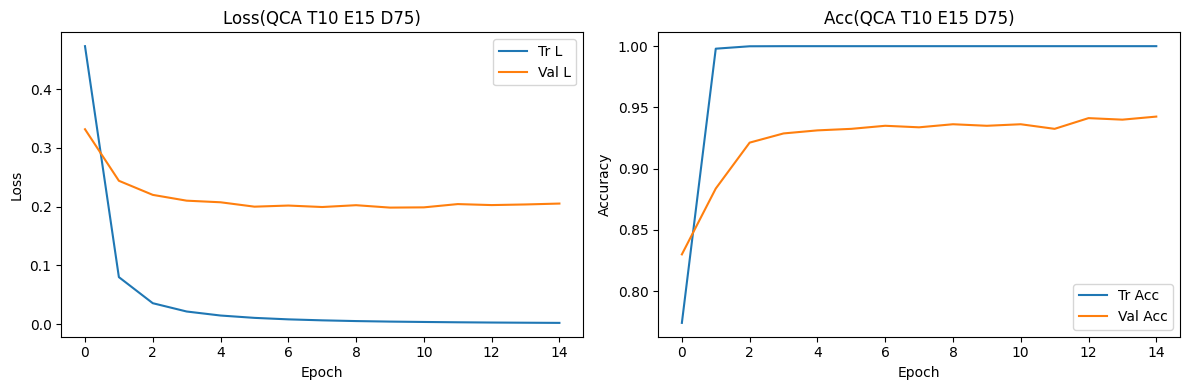

Preparing 3 test prompts for 20-step auto-regressive prediction...

--- Starting Auto-Regressive Predictions (20 steps) ---

Test Sample 1:
Generated Future (20 steps):
Actual Future (20 steps):
Auto-regressive accuracy for sample 1 (20 steps): 87.50%
Saved comparison plot for sample 1 to qca_ai_REAL_QCA_generate_train_autoregress_v2/autoregressive_predictions


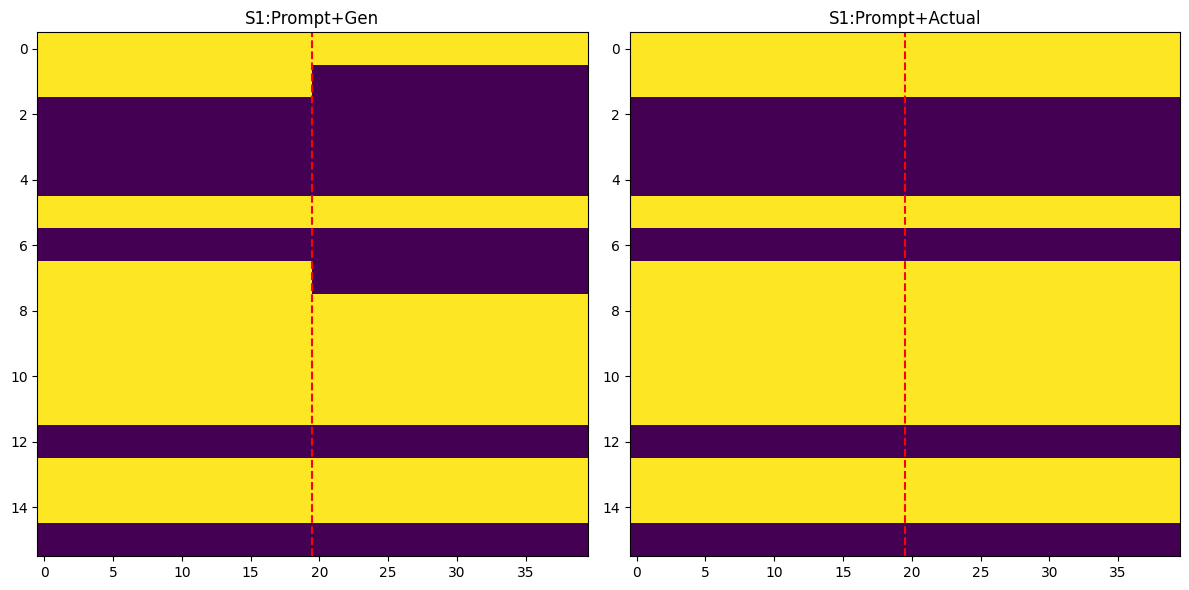


Test Sample 2:
Generated Future (20 steps):
Actual Future (20 steps):
Auto-regressive accuracy for sample 2 (20 steps): 91.25%
Saved comparison plot for sample 2 to qca_ai_REAL_QCA_generate_train_autoregress_v2/autoregressive_predictions


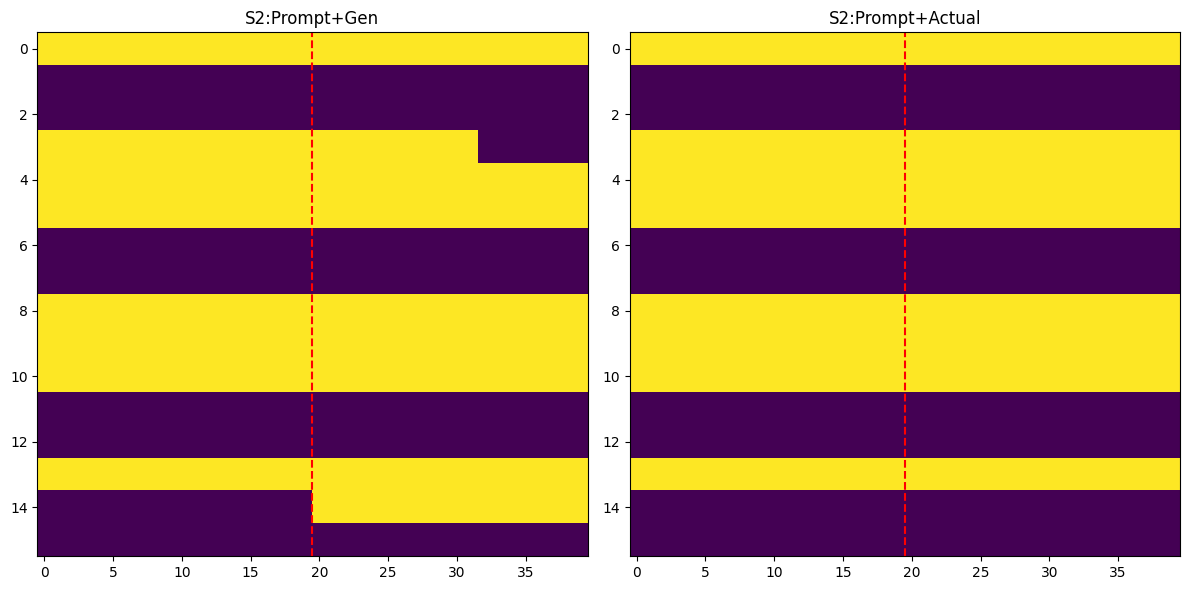


Test Sample 3:
Generated Future (20 steps):
Actual Future (20 steps):
Auto-regressive accuracy for sample 3 (20 steps): 100.00%
Saved comparison plot for sample 3 to qca_ai_REAL_QCA_generate_train_autoregress_v2/autoregressive_predictions


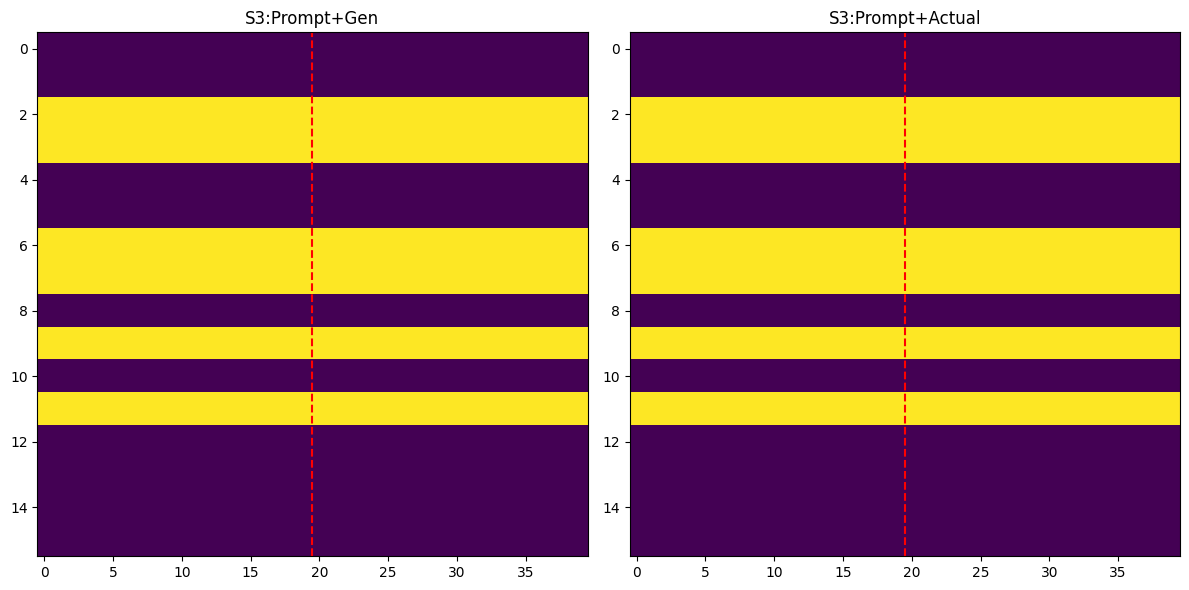


--- COMBINED Generate, Train (TGT=10, E=15), and Auto-Regress Demo Complete ---
Outputs are in: qca_ai_REAL_QCA_generate_train_autoregress_v2


In [2]:

import numpy as np
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import gc
import copy

# --- Qiskit and QCA Related Imports & Definitions ---
import qiskit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import (CXGate, CZGate, RZZGate, RXXGate, RYYGate,
                                    SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate)

TYPE_A = 0; TYPE_B = 1; TYPE_C = 2
GATES = {
    "H": HGate(), "X": XGate(), "I": IGate(), "S": SGate(), "T": TGate(),
    "CX": CXGate(), "CZ": CZGate(), "SWAP": SwapGate(), "CCX": CCXGate(),
    "RZZ_PIO4": RZZGate(np.pi/4), "RZZ_PIO2": RZZGate(np.pi/2),
    "RXX_PIO4": RXXGate(np.pi/4), "RYY_PIO4": RYYGate(np.pi/4)
}
GATES_2Q = {k: v for k, v in GATES.items() if hasattr(v, 'num_qubits') and v.num_qubits == 2}
GATES_2Q["I"] = IGate()

def get_default_params_for_rule(rule_name, num_types=2):
    if rule_name == "simple_threshold_3types":
        if num_types == 2:
            return {"name": "simple_threshold_3types", "thresh_A_to_B": 0.501, "thresh_B_to_A": 0.499}
        else:
            return {"name": "simple_threshold_3types", "thresh_A_to_B":0.501,"thresh_A_to_C":0.05,
                    "thresh_B_to_A":0.499,"thresh_B_to_C":0.95, "thresh_C_to_A":0.45,"thresh_C_to_B":0.55}
    elif rule_name == "quantum_neighborhood_logic_v1":
        return {"name": "quantum_neighborhood_logic_v1", "sensitivity":0.1, "prob_boundary_flip":0.2, "prob_C_decay":0.05}
    return {"name": rule_name}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: dict, type_update_rule_config: dict,
                 initial_quantum_state_prep: str = "hadamard_all",
                 num_distinct_types_in_data: int = 2):
        self.num_qunodes = num_qunodes; self.current_types = initial_types.copy()
        self.type_history = [self.current_types.copy()]; self.quantum_outcome_history = []
        self.interaction_config = interaction_config; self.type_update_rule_config = type_update_rule_config
        self.initial_quantum_state_prep = initial_quantum_state_prep
        self.num_distinct_types_in_data = num_distinct_types_in_data
        try: self.simulator = AerSimulator(method='statevector')
        except ImportError: print("WARNING: qiskit-aer not found."); self.simulator = None
        self.circuit_visualization_list = []
    def _get_interaction_unitary(self, t1, t2):
        k = tuple(sorted((t1, t2))); gi = GATES_2Q["I"]; acond=self.num_distinct_types_in_data>2
        if k==(TYPE_A,TYPE_A):gi=self.interaction_config.get("AA",GATES_2Q["I"])
        elif k==(TYPE_B,TYPE_B):gi=self.interaction_config.get("BB",GATES_2Q["I"])
        elif k==(TYPE_C,TYPE_C)and acond:gi=self.interaction_config.get("CC",GATES_2Q["I"])
        elif k==(TYPE_A,TYPE_B):gi=self.interaction_config.get("AB",GATES_2Q["I"])
        elif k==(TYPE_A,TYPE_C)and acond:gi=self.interaction_config.get("AC",GATES_2Q["I"])
        elif k==(TYPE_B,TYPE_C)and acond:gi=self.interaction_config.get("BC",GATES_2Q["I"])
        if hasattr(gi,'num_qubits')and gi.num_qubits!=2 and gi.name.lower()!='id':return GATES_2Q["I"]
        return gi
    def _build_interaction_circuit(self):
        qc=qiskit.QuantumCircuit(self.num_qunodes);aio=False;acond=self.num_distinct_types_in_data>2
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i) for i in range(self.num_qunodes)];aio=True
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i);aio=True
                elif self.current_types[i]==TYPE_C and acond:qc.x(i);aio=True
        elif self.initial_quantum_state_prep=="mixed_A0_BH_CH":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.h(i);aio=True
                elif self.current_types[i]==TYPE_C and acond:qc.h(i);qc.x(i);aio=True
        if aio and self.num_qunodes>0:qc.barrier()
        ai=False
        for i in range(self.num_qunodes):op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
        if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);ai=True
        if ai and self.num_qunodes>1:qc.barrier()
        return qc
    def _apply_type_update_rule(self,q_out:np.ndarray)->np.ndarray:
        nt=self.current_types.copy();cfg=self.type_update_rule_config;rn=cfg.get("name","simple_threshold_3types");acond=self.num_distinct_types_in_data>2
        if rn=="simple_threshold_3types":
            for i in range(self.num_qunodes):p1=q_out[i];ct=self.current_types[i]
            if ct==TYPE_A:
                if p1>cfg.get("thresh_A_to_B",0.6):nt[i]=TYPE_B
                elif acond and p1<cfg.get("thresh_A_to_C",0.2):nt[i]=TYPE_C
            elif ct==TYPE_B:
                if p1<cfg.get("thresh_B_to_A",0.4):nt[i]=TYPE_A
                elif acond and p1>cfg.get("thresh_B_to_C",0.8):nt[i]=TYPE_C
            elif ct==TYPE_C and acond:
                if p1>cfg.get("thresh_C_to_B",0.55):nt[i]=TYPE_B
                elif p1<cfg.get("thresh_C_to_A",0.45):nt[i]=TYPE_A
        return nt
    def step(self): # CORRECTED STEP METHOD
        if self.simulator is None:
            raise RuntimeError("AerSimulator not available.")
        interaction_qc = self._build_interaction_circuit()
        p1_outcomes = np.full(self.num_qunodes, 0.5)
        if interaction_qc.size() > 0:
            try:
                statevector_obj = Statevector(interaction_qc)
                for i in range(self.num_qunodes): # Correctly placed loop
                    prob_dist = statevector_obj.probabilities([i])
                    if len(prob_dist) == 2: p1_outcomes[i] = prob_dist[1]
                    elif len(prob_dist) == 1: p1_outcomes[i] = 0.0 if prob_dist[0] > 0.9999 else 0.5
                    else: p1_outcomes[i] = 0.5
            except Exception as e:
                print(f"Error during Qiskit Statevector simulation or probability extraction: {e}")
        self.quantum_outcome_history.append(p1_outcomes.copy())
        new_classical_types = self._apply_type_update_rule(p1_outcomes)
        self.current_types = new_classical_types
        self.type_history.append(self.current_types.copy())
        return p1_outcomes
    def run(self, ns, v=False):
        it = tqdm(range(ns), desc=f"QCA N={self.num_qunodes}", leave=False) if not v else range(ns)
        for _ in it: self.step()
        if not v and hasattr(it, 'close'): it.close() # Correctly indented
    def get_type_history_as_array(self):return np.array(self.type_history,dtype=int)

# --- CONFIGURATIONS ---
best_qca_config_found={"interaction_config":{"AA":"CX","BB":"CX","CC":"CX","AB":"CX","AC":"CX","BC":"CX"},
    "type_update_rule_config":get_default_params_for_rule("simple_threshold_3types",num_types=2),
    "initial_quantum_state_prep":"basis_from_type","num_distinct_types_qca":2,"num_qunodes":16}
inter_conf_obj={k:GATES_2Q.get(v,GATES_2Q["I"]) for k,v in best_qca_config_found["interaction_config"].items()}
best_qca_conf_obj=copy.deepcopy(best_qca_config_found);best_qca_conf_obj["interaction_config"]=inter_conf_obj

BASE_OUT_COMBINED = "qca_ai_REAL_QCA_generate_train_autoregress_v2" # New version for this run
RAW_DIR = os.path.join(BASE_OUT_COMBINED, "raw_data")
TRANSFORMER_DATA_DIR = os.path.join(BASE_OUT_COMBINED, "transformer_data")
MODEL_SAVE_DIR = os.path.join(BASE_OUT_COMBINED, "trained_model")
AUTOREGRESSIVE_RESULTS_DIR = os.path.join(BASE_OUT_COMBINED, "autoregressive_predictions")
for d in [BASE_OUT_COMBINED, RAW_DIR, TRANSFORMER_DATA_DIR, MODEL_SAVE_DIR, AUTOREGRESSIVE_RESULTS_DIR]:
    os.makedirs(d, exist_ok=True)

N_Q_REAL = best_qca_conf_obj["num_qunodes"]; VOC_SZ_REAL = best_qca_conf_obj["num_distinct_types_qca"]
NUM_RAW_RUNS_R = 25; RAW_DEPTH_R = 75
IN_SEQ_TF = 20; TGT_SEQ_TF = 10; tf_wl = IN_SEQ_TF + TGT_SEQ_TF
TF_EPOCHS = 15; TF_BATCH_R = 16
EMB_S= 32; DM_T= 64; NH_T= 4; FF_T= 64; NB_T= 1; DRP_T=0.1

# --- Part 1: Data Generation ---
raw_data_filename = f"raw_REAL_N{N_Q_REAL}_r{NUM_RAW_RUNS_R}_d{RAW_DEPTH_R}_hist.npy"
raw_data_filepath = os.path.join(RAW_DIR, raw_data_filename)
if not os.path.exists(raw_data_filepath):
    print(f"Gen raw REAL QCA (N={N_Q_REAL}, {NUM_RAW_RUNS_R} runs, Depth={RAW_DEPTH_R}, {VOC_SZ_REAL}-types)...");raw_h_gen=[]
    for run_idx in tqdm(range(NUM_RAW_RUNS_R),desc="Gen Real QCA Runs"):
        init_types = np.random.randint(0,VOC_SZ_REAL,size=N_Q_REAL)
        qca=QuantumCellularAutomaton(N_Q_REAL,init_types,best_qca_conf_obj["interaction_config"],
                                     best_qca_conf_obj["type_update_rule_config"],
                                     best_qca_conf_obj["initial_quantum_state_prep"],VOC_SZ_REAL)
        qca.run(RAW_DEPTH_R);raw_h_gen.append(qca.get_type_history_as_array())
    np.save(raw_data_filepath,np.array(raw_h_gen,dtype=object));print(f"Raw REAL QCA saved to {raw_data_filepath}.");raw_hist_list_for_processing=raw_h_gen
else:
    print(f"Loading existing raw REAL QCA data from {raw_data_filepath}...");raw_h_load=np.load(raw_data_filepath,allow_pickle=True);raw_h_corr=[]
    print("Correct dtypes of loaded raw REAL QCA histories...")
    for h_idx,h_obj in enumerate(tqdm(raw_h_load,desc="Correct Dtypes")):
        ph=None
        if isinstance(h_obj,np.ndarray):
            if h_obj.dtype==object:
                try:
                    lor=[];vr=True
                    for rc in h_obj:
                        if isinstance(rc,(list,np.ndarray)):
                            npr=np.array(rc,dtype=np.int32)
                            if npr.ndim==1 and len(npr)==N_Q_REAL:lor.append(npr)
                            elif npr.ndim==0 and N_Q_REAL==1:lor.append(np.array([npr.item()],dtype=np.int32))
                            else:vr=False;break
                        else:vr=False;break
                    if vr and lor:sh=np.stack(lor);ph=sh.astype(np.int32) if sh.ndim==2 and sh.shape[1]==N_Q_REAL else None
                except Exception as e: print(f" Error processing object hist {h_idx}: {e}")
            elif h_obj.dtype!=np.int32: ph=h_obj.astype(np.int32)
            else: ph=h_obj
        if ph is not None and ph.ndim==2 and ph.shape[0]>0 and ph.shape[1]==N_Q_REAL: raw_h_corr.append(ph)
    raw_hist_list_for_processing=raw_h_corr
    if not raw_hist_list_for_processing:print("CRIT: No valid REAL QCA hist after correction.");exit()
    print(f"Loaded/corrected {len(raw_hist_list_for_processing)} REAL QCA histories.")

# --- Part 2: Prepare Transformer Data ---
enc_in_f_t10, dec_in_f_t10, dec_tgt_f_t10 = [], [], []
print(f"\nRe-windowing raw data for Transformer (Input={IN_SEQ_TF}, Target={TGT_SEQ_TF})...");
for history_data in tqdm(raw_hist_list_for_processing, desc="Re-windowing Histories"):
    num_timesteps = history_data.shape[0]
    for i in range(num_timesteps - tf_wl + 1):
        window_data = history_data[i : i + tf_wl]
        if window_data.shape[0] != tf_wl : continue
        enc_in_f_t10.append(window_data[:IN_SEQ_TF])
        dec_in_f_t10.append(window_data[IN_SEQ_TF:])
        dec_tgt_f_t10.append(window_data[IN_SEQ_TF:])
if not enc_in_f_t10:print("CRIT: No valid sequences created for TF.");exit()
enc_in_d=np.array(enc_in_f_t10,np.int32);dec_in_d=np.array(dec_in_f_t10,np.int32);dec_tgt_d=np.array(dec_tgt_f_t10,np.int32)
print(f"Transformer Encoder Input shape: {enc_in_d.shape}")
tf_data_filename_prefix = f"tf_data_N{N_Q_REAL}_in{IN_SEQ_TF}_tgt{TGT_SEQ_TF}"
np.save(os.path.join(TRANSFORMER_DATA_DIR, f"{tf_data_filename_prefix}_enc_in.npy"), enc_in_d)
np.save(os.path.join(TRANSFORMER_DATA_DIR, f"{tf_data_filename_prefix}_dec_in.npy"), dec_in_d)
np.save(os.path.join(TRANSFORMER_DATA_DIR, f"{tf_data_filename_prefix}_dec_tgt.npy"), dec_tgt_d)
print(f"Prepared Transformer data saved to {TRANSFORMER_DATA_DIR}")

# --- Part 3: Transformer Model Definition & Training ---
class PE(layers.Layer):
    def __init__(self,p,d,**kw):super(PE,self).__init__(**kw);self.p,self.d,self.enc=p,d,self._pe(p,d)
    def _ga(self,p,i,d):a=1/np.power(10000,(2*(i//2))/np.float32(d));return p*a
    def _pe(self,p,d):ar=self._ga(np.arange(p)[:,np.newaxis],np.arange(d)[np.newaxis,:],d);ar[:,0::2]=np.sin(ar[:,0::2]);ar[:,1::2]=np.cos(ar[:,1::2]);pe=ar[np.newaxis,...];return tf.cast(pe,tf.float32)
    def call(self,x):return x+self.enc[:,:tf.shape(x)[1],:]
    def get_config(self):c=super().get_config();c.update({"position":self.p,"d_model":self.d});return c
def tfe(vs,nq,es,dm,nh,ffd,nb,r,ml):
    i=layers.Input(shape=(None,nq),dtype=tf.int32);semb=layers.Embedding(vs,es)(i);x=layers.Reshape((-1,nq*es))(semb);x=layers.Dense(dm,activation="relu")(x)
    x=PE(ml,dm)(x);x=layers.Dropout(r)(x)
    for _ in range(nb):att=layers.MultiHeadAttention(nh,max(1,dm//nh),dropout=r)(x,x);o1=layers.LayerNormalization(epsilon=1e-6)(x+att);ff=layers.Dense(ffd,activation="relu")(o1);ff=layers.Dense(dm)(ff);ff=layers.Dropout(r)(ff);x=layers.LayerNormalization(epsilon=1e-6)(o1+ff)
    return keras.Model(inputs=i,outputs=x,name=f"tfe_{nb}_{dm}")
def tfd(vs,nq,es,dm,nh,ffd,nb,r,ml):
    i=layers.Input(shape=(None,nq),dtype=tf.int32);eo=layers.Input(shape=(None,dm));semb=layers.Embedding(vs,es)(i);x=layers.Reshape((-1,nq*es))(semb)
    x=layers.Dense(dm,activation="relu")(x);x=PE(ml,dm)(x);x=layers.Dropout(r)(x)
    for _ in range(nb):sa=layers.MultiHeadAttention(nh,max(1,dm//nh),dropout=r)(x,x,use_causal_mask=True);xn1=layers.LayerNormalization(epsilon=1e-6)(x+sa);ca=layers.MultiHeadAttention(nh,max(1,dm//nh),dropout=r)(xn1,eo);xn2=layers.LayerNormalization(epsilon=1e-6)(xn1+ca);ff=layers.Dense(ffd,activation="relu")(xn2);ff=layers.Dense(dm)(ff);ff=layers.Dropout(r)(ff);x=layers.LayerNormalization(epsilon=1e-6)(xn2+ff)
    return keras.Model(inputs=[i,eo],outputs=x,name=f"tfd_{nb}_{dm}")
def build_tfm(vs,nq,es,dm,nh,ffd,neb,ndb,dr,mil,mtl):
    ei=layers.Input(shape=(None,nq),dtype=tf.int32,name="ei");di=layers.Input(shape=(None,nq),dtype=tf.int32,name="di")
    enc=tfe(vs,nq,es,dm,nh,ffd,neb,dr,mil);dec=tfd(vs,nq,es,dm,nh,ffd,ndb,dr,mtl)
    enco=enc(ei);deco=dec([di,enco]);fin=layers.Dense(nq*vs,name="fd")(deco);fin=layers.Reshape((-1,nq,vs),name="fr")(fin)
    fin=layers.Softmax(axis=-1,name="fs")(fin);return keras.Model([ei,di],fin,name=f"QCA_Transformer_T{TGT_SEQ_TF}_E{TF_EPOCHS}")

print(f"\nBuild & train TF (Target={TGT_SEQ_TF}, {TF_EPOCHS} epochs) on REAL QCA data...")
qca_ai_transformer_trained=build_tfm(VOC_SZ_REAL,N_Q_REAL,EMB_S,DM_T,NH_T,FF_T,NB_T,NB_T,DRP_T,
                             IN_SEQ_TF+10, TGT_SEQ_TF+10)
qca_ai_transformer_trained.compile(optimizer=keras.optimizers.Adam(0.001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
qca_ai_transformer_trained.summary(line_length=100)
nfs=enc_in_d.shape[0];val_spl_idx=int(nfs*0.8) if nfs>=TF_BATCH_R*2 else (nfs-max(1,int(nfs*0.15)) if nfs>TF_BATCH_R else 0)
tr_ei,tr_di,tr_dt=enc_in_d[:val_spl_idx],dec_in_d[:val_spl_idx],dec_tgt_d[:val_spl_idx]
v_ei,v_di,v_dt=enc_in_d[val_spl_idx:],dec_in_d[val_spl_idx:],dec_tgt_d[val_spl_idx:]
val_data_fit_r=([v_ei,v_di],v_dt) if v_ei.shape[0]>0 and tr_ei.shape[0] > 0 else None
if tr_ei.shape[0]>0:
    print(f"Train TF (Target={TGT_SEQ_TF}) on {tr_ei.shape[0]} REAL QCA samp...");
    h_tf_train=qca_ai_transformer_trained.fit([tr_ei,tr_di],tr_dt,batch_size=TF_BATCH_R,epochs=TF_EPOCHS,
                                  validation_data=val_data_fit_r,verbose=1, shuffle=True)
    model_filename = f"qca_ai_tf_N{N_Q_REAL}_T{TGT_SEQ_TF}_r{NUM_RAW_RUNS_R}_d{RAW_DEPTH_R}_e{TF_EPOCHS}.keras"
    full_model_save_path = os.path.join(MODEL_SAVE_DIR, model_filename)
    qca_ai_transformer_trained.save(full_model_save_path)
    print(f"Trained REAL QCA AI (TF, Target={TGT_SEQ_TF}) saved to {full_model_save_path}")
    if 'loss' in h_tf_train.history:
        plot_filename = f"tf_train_curves_N{N_Q_REAL}_T{TGT_SEQ_TF}_r{NUM_RAW_RUNS_R}_d{RAW_DEPTH_R}_e{TF_EPOCHS}.png"
        plt.figure(figsize=(12, 4));plt.subplot(1,2,1);plt.plot(h_tf_train.history['loss'],label='Tr L');
        if val_data_fit_r and 'val_loss' in h_tf_train.history:plt.plot(h_tf_train.history['val_loss'],label='Val L')
        plt.title(f'Loss(QCA T{TGT_SEQ_TF} E{TF_EPOCHS} D{RAW_DEPTH_R})');plt.xlabel('Epoch');plt.ylabel('Loss');plt.legend()
        plt.subplot(1,2,2);plt.plot(h_tf_train.history['accuracy'],label='Tr Acc');
        if val_data_fit_r and 'val_accuracy' in h_tf_train.history:plt.plot(h_tf_train.history['val_accuracy'],label='Val Acc')
        plt.title(f'Acc(QCA T{TGT_SEQ_TF} E{TF_EPOCHS} D{RAW_DEPTH_R})');plt.xlabel('Epoch');plt.ylabel('Accuracy');plt.legend()
        plt.tight_layout();plt.savefig(os.path.join(AUTOREGRESSIVE_RESULTS_DIR, plot_filename));plt.show() # Changed save dir to autoregressive for plots too
else: print("Not enough re-windowed REAL QCA data to train Transformer.")

# --- Part 4: Auto-Regressive Prediction ---
def autoregressive_predict(model, encoder_input_prompt, num_steps_to_generate, num_qunodes, vocab_size, model_target_seq_len):
    if encoder_input_prompt.shape[1] != IN_SEQ_TF:
        raise ValueError(f"Prompt length {encoder_input_prompt.shape[1]} != IN_SEQ_TF {IN_SEQ_TF}")
    generated_qca_states = []
    current_full_history = list(encoder_input_prompt[0])
    for _ in range(num_steps_to_generate):
        current_enc_input = np.array([current_full_history[-IN_SEQ_TF:]], dtype=np.int32)
        dummy_decoder_input = np.zeros((1, model_target_seq_len, num_qunodes), dtype=np.int32)
        predicted_block_probs = model.predict([current_enc_input, dummy_decoder_input], verbose=0)
        next_step_probs = predicted_block_probs[0, 0, :, :]
        next_step_states = np.argmax(next_step_probs, axis=-1).astype(np.int32)
        generated_qca_states.append(next_step_states)
        current_full_history.append(next_step_states)
    return np.array(generated_qca_states)

num_test_predictions = min(3, len(raw_hist_list_for_processing))
test_prompts = []; actual_continuations = []
num_steps_to_predict_autoregressive = 20
print(f"Preparing {num_test_predictions} test prompts for {num_steps_to_predict_autoregressive}-step auto-regressive prediction...")
for i in range(num_test_predictions):
    history_sample = raw_hist_list_for_processing[i]
    if history_sample.shape[0] >= IN_SEQ_TF + num_steps_to_predict_autoregressive:
        test_prompts.append(history_sample[:IN_SEQ_TF])
        actual_continuations.append(history_sample[IN_SEQ_TF : IN_SEQ_TF + num_steps_to_predict_autoregressive])
    else: print(f"History sample {i} (len {history_sample.shape[0]}) too short. Skipping.")

if test_prompts:
    print(f"\n--- Starting Auto-Regressive Predictions ({num_steps_to_predict_autoregressive} steps) ---")
    for i in range(len(test_prompts)):
        prompt_sequence_np = np.array([test_prompts[i]], dtype=np.int32)
        print(f"\nTest Sample {i+1}:")
        generated_qca_future = autoregressive_predict(
            qca_ai_transformer_trained, prompt_sequence_np, # Use the just-trained model
            num_steps_to_predict_autoregressive, N_Q_REAL, VOC_SZ_REAL,
            TGT_SEQ_TF )
        print(f"Generated Future ({generated_qca_future.shape[0]} steps):")
        ground_truth_future = actual_continuations[i]
        print(f"Actual Future ({ground_truth_future.shape[0]} steps):")
        if generated_qca_future.shape == ground_truth_future.shape:
            correct_cells = np.sum(generated_qca_future == ground_truth_future)
            total_cells = np.prod(ground_truth_future.shape)
            accuracy = correct_cells / total_cells if total_cells > 0 else 0
            print(f"Auto-regressive accuracy for sample {i+1} ({num_steps_to_predict_autoregressive} steps): {accuracy*100:.2f}%")
            fig, axes = plt.subplots(1, 2, figsize=(12, max(5, num_steps_to_predict_autoregressive * 0.3)))
            ax=axes[0]; combined_gen=np.vstack([test_prompts[i],generated_qca_future])
            ax.imshow(combined_gen.T,aspect='auto',cmap='viridis',vmin=0,vmax=VOC_SZ_REAL-1); ax.set_title(f"S{i+1}:Prompt+Gen"); ax.axvline(x=IN_SEQ_TF-0.5,color='r',ls='--')
            ax=axes[1]; combined_actual=np.vstack([test_prompts[i],ground_truth_future])
            ax.imshow(combined_actual.T,aspect='auto',cmap='viridis',vmin=0,vmax=VOC_SZ_REAL-1); ax.set_title(f"S{i+1}:Prompt+Actual"); ax.axvline(x=IN_SEQ_TF-0.5,color='r',ls='--')
            plt.tight_layout(); plt.savefig(os.path.join(AUTOREGRESSIVE_RESULTS_DIR, f"autoreg_comp_{i+1}_pred{num_steps_to_predict_autoregressive}.png"))
            print(f"Saved comparison plot for sample {i+1} to {AUTOREGRESSIVE_RESULTS_DIR}"); plt.show(); plt.close(fig)
        else: print(f"Shape mismatch for sample {i+1}: Gen {generated_qca_future.shape}, Act {ground_truth_future.shape}")
else: print("Could not create test prompts for auto-regressive prediction.")

print(f"\n--- COMBINED Generate, Train (TGT={TGT_SEQ_TF}, E={TF_EPOCHS}), and Auto-Regress Demo Complete ---")
print(f"Outputs are in: {BASE_OUT_COMBINED}")